# Gene annotations

Load gtf file and explore distribution and lengths of transcripts, introns and exons.

In [ ]:
import pandas as pd
from splicevo.io.gene_annotation import GTFProcessor

# Load human gtf file
# Mazin et al.
gtf_path_human="/home/elek/sds/sd17d003/Anamaria/genomes/mazin/gtf/Homo_sapiens.gtf.gz"
chromosomes=['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', 'X', 'Y', 'MT']
# Gencode
gtf_path_human="/home/elek/sds/sd17d003/Anamaria/genomes/gencode/gtf/Homo_sapiens.gtf.gz"
chromosomes=['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19', 'chr20', 'chr21', 'chrX', 'chrY', 'chrMT']


# Load mouse gtf file
# Mazin et al.
gtf_path_mouse="/home/elek/sds/sd17d003/Anamaria/genomes/mazin/gtf/Mus_musculus.gtf.gz"
chromosomes=['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', 'X', 'Y', 'MT']
# Gencode
gtf_path_mouse="/home/elek/sds/sd17d003/Anamaria/genomes/gencode/gtf/Mus_musculus.gtf.gz"
chromosomes=['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19', 'chrX', 'chrY', 'chrMT']

# Process gtf
gtf_human = GTFProcessor(gtf_path_human)
gtf_mouse = GTFProcessor(gtf_path_mouse)
gtf_df_human = gtf_human.load_gtf(chromosomes=chromosomes)
gtf_df_mouse = gtf_mouse.load_gtf(chromosomes=chromosomes)

# Combine into joint dataframe, keeping track of the genome
gtf_df_human['genome'] = 'human'
gtf_df_mouse['genome'] = 'mouse'
gtf_df = pd.concat([gtf_df_human, gtf_df_mouse], axis=0)

Loading GTF file...
Loaded 4019183 GTF records
Loading GTF file...
Loaded 1892394 GTF records


In [ ]:
# Optionally filter to protein coding genes only
gtf_df = gtf_df[gtf_df['gene_type']=='protein_coding']

## Transcripts

Plot histogram of transcript lengths

In [ ]:
# Filter transcripts
trn_df = gtf_df[gtf_df['feature'] == 'transcript']

# Add transcript width
trn_df['width'] = trn_df['end'] - trn_df['start']
trn_df

/tmp/ipykernel_1023435/1365588477.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trn_df['width'] = trn_df['end'] - trn_df['start']


,chrom,source,feature,start,end,score,strand,frame,gene_id,gene_type,...,havana_transcript,hgnc_id,havana_gene,ont,protein_id,ccdsid,artif_dupl,genome,mgi_id,width
1,chr1,HAVANA,transcript,11121,14413,.,+,.,ENSG00000290825.2,lncRNA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,human,NaN,3292
6,chr1,HAVANA,transcript,11125,14405,.,+,.,ENSG00000290825.2,lncRNA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,human,NaN,3280
11,chr1,HAVANA,transcript,11410,14413,.,+,.,ENSG00000290825.2,lncRNA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,human,NaN,3003
16,chr1,HAVANA,transcript,11411,14413,.,+,.,ENSG00000290825.2,lncRNA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,human,NaN,3002
21,chr1,HAVANA,transcript,11426,14409,.,+,.,ENSG00000290825.2,lncRNA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,human,NaN,2983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1892372,chrY,HAVANA,transcript,90796007,90827716,.,+,.,ENSMUSG00000096768.10,lncRNA,...,OTTMUST00000181503.1,NaN,OTTMUSG00000074820.2,NaN,NaN,NaN,NaN,mouse,MGI:6096131,31709
1892377,chrY,HAVANA,transcript,90796180,90827727,.,+,.,ENSMUSG00000096768.10,lncRNA,...,OTTMUST00000181504.1,NaN,OTTMUSG00000074820.2,NaN,NaN,NaN,NaN,mouse,MGI:6096131,31547
1892381,chrY,HAVANA,transcript,90797117,90827667,.,+,.,ENSMUSG00000096768.10,lncRNA,...,OTTMUST00000181506.1,NaN,OTTMUSG00000074820.2,NaN,NaN,NaN,NaN,mouse,MGI:6096131,30550
1892385,chrY,HAVANA,transcript,90801720,90827734,.,+,.,ENSMUSG00000096768.10,lncRNA,...,OTTMUST00000181505.1,NaN,OTTMUSG00000074820.2,NaN,NaN,NaN,NaN,mouse,MGI:6096131,26014


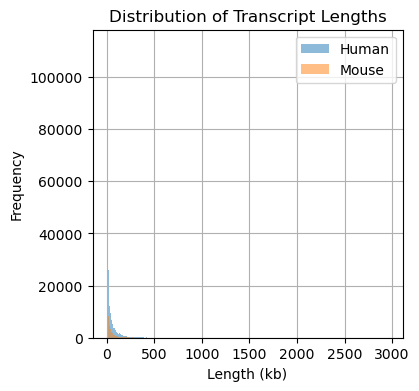

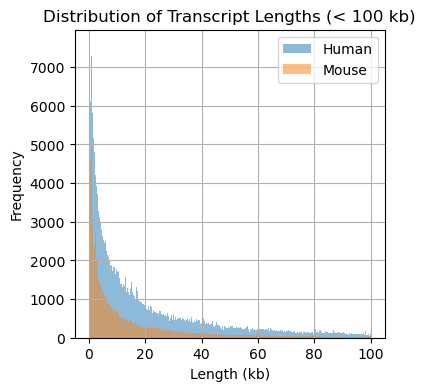

In [ ]:
# plot histogram of transcript lengths, grouped by genome
import matplotlib.pyplot as plt

human=trn_df[trn_df['genome'] == 'human']
mouse=trn_df[trn_df['genome'] == 'mouse']

plt.figure(figsize=(4, 4))
plt.hist(human['width']/1000, bins=100, alpha=0.5, label='Human')
plt.hist(mouse['width']/1000, bins=100, alpha=0.5, label='Mouse')
plt.title('Distribution of Transcript Lengths')
plt.xlabel('Length (kb)')
plt.ylabel('Frequency')
plt.grid()
plt.legend()
plt.show()

# zoom in on the transcripts < 100 Mb
plt.figure(figsize=(4, 4))
plt.hist(human[human['width'] < 100000]['width']/1000, bins=500, alpha=0.5, label='Human')
plt.hist(mouse[mouse['width'] < 100000]['width']/1000, bins=500, alpha=0.5, label='Mouse')
plt.title('Distribution of Transcript Lengths (< 100 kb)')
plt.xlabel('Length (kb)')
plt.ylabel('Frequency')
plt.grid()
plt.legend()
plt.show()

Exons

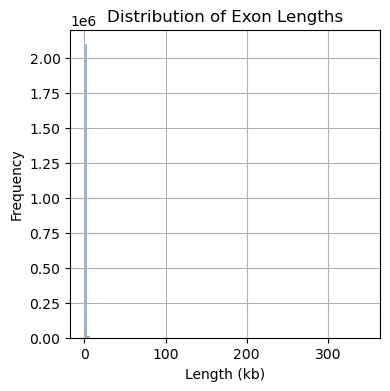

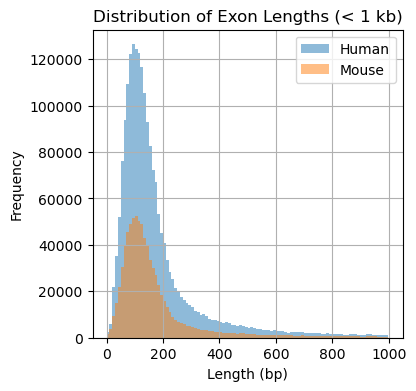

In [ ]:
exons_df = gtf_df[gtf_df['feature'] == 'exon']
exons_df['width'] = exons_df['end'] - exons_df['start']

human=exons_df[exons_df['genome'] == 'human']
mouse=exons_df[exons_df['genome'] == 'mouse']

# Plot histogram of exon lengths
plt.figure(figsize=(4, 4))
plt.hist((human['width'])/1000, bins=100, alpha=0.5, label='Human')
plt.hist((mouse['width'])/1000, bins=100, alpha=0.5, label='Mouse')
plt.title('Distribution of Exon Lengths')
plt.xlabel('Length (kb)')
plt.ylabel('Frequency')
plt.grid()
plt.show()

# zoom in on the exons < 10 kb
plt.figure(figsize=(4, 4))
plt.hist(human[human['width'] < 1000]['width'], bins=100, alpha=0.5, label='Human')
plt.hist(mouse[mouse['width'] < 1000]['width'], bins=100, alpha=0.5, label='Mouse')
plt.title('Distribution of Exon Lengths (< 1 kb)')
plt.xlabel('Length (bp)')
plt.ylabel('Frequency')
plt.grid()
plt.legend()
plt.show()

Length of the transcribed region per transcript or gene (sum of exons).

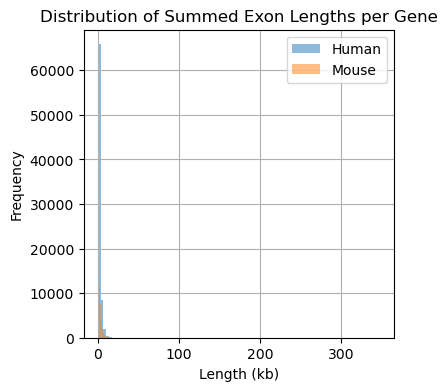

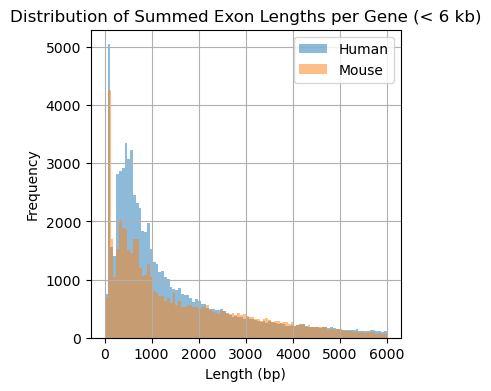

In [155]:
# sum exons per transcript
exon_sums = exons_df.groupby(['genome', 'gene_id', 'transcript_id']).agg({'width': 'sum'}).reset_index()

# sum exons per gene
exon_sums_gene = exons_df[['genome', 'gene_id', 'width']].groupby(['genome', 'gene_id']).agg({'width': 'sum'}).reset_index()

# sum exons of only one transcript per gene (the longest)
exon_sums_transcript = exons_df[['genome', 'gene_id', 'transcript_id', 'width']].groupby(['genome', 'gene_id', 'transcript_id']).agg({'width': 'sum'}).reset_index()
exon_sums_transcript = exon_sums_transcript.sort_values(['genome', 'gene_id', 'width'], ascending=[True, True, False])
exon_sums_transcript = exon_sums_transcript.groupby(['genome', 'gene_id']).first().reset_index()

human=exon_sums_transcript[exon_sums_transcript['genome'] == 'human']
mouse=exon_sums_transcript[exon_sums_transcript['genome'] == 'mouse']

# plot histogram of summed exon lengths per transcript, grouped by genome
plt.figure(figsize=(4, 4))
plt.hist(human['width']/1000, bins=100, alpha=0.5, label='Human')
plt.hist(mouse['width']/1000, bins=100, alpha=0.5, label='Mouse')
plt.title('Distribution of Summed Exon Lengths per Gene')
plt.xlabel('Length (kb)')
plt.ylabel('Frequency')
plt.grid()
plt.legend()
plt.show()
    
# zoom in on the summed exon lengths per transcript < 10 kb
plt.figure(figsize=(4, 4))
plt.hist(human[human['width'] < 6000]['width'], bins=100, alpha=0.5, label='Human')
plt.hist(mouse[mouse['width'] < 6000]['width'], bins=100, alpha=0.5, label='Mouse')
plt.title('Distribution of Summed Exon Lengths per Gene (< 6 kb)')
plt.xlabel('Length (bp)')
plt.ylabel('Frequency') 
plt.grid()
plt.legend()
plt.show()


Length of transcribed regions for differrent gene biotypes.

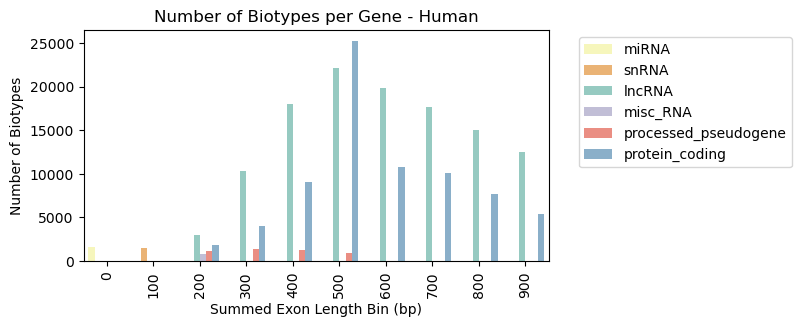

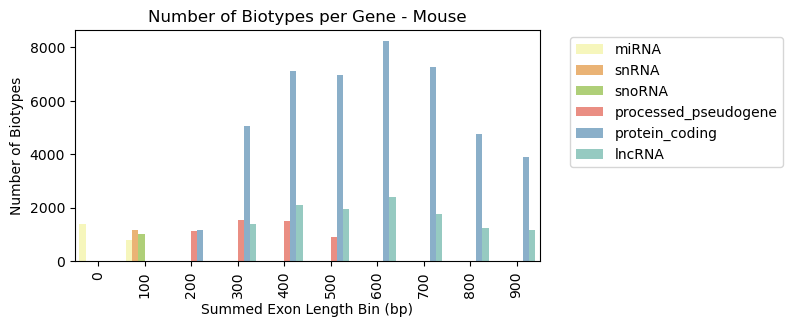

In [157]:
# number of biotypes per gene for genes groupped by summed expn length in bins of 100 bp
exon_sums['length_bin'] = (exon_sums['width'] // 100) * 100
exon_sums_biotype_counts=gtf_df[gtf_df['feature'] == 'transcript'][['genome', 'gene_id', 'transcript_id', 'gene_type']].drop_duplicates()
exon_sums_biotype_counts=exon_sums_biotype_counts.merge(exon_sums[['genome', 'gene_id', 'transcript_id', 'length_bin']], on=['genome', 'gene_id', 'transcript_id'], how='left')
exon_sums_biotype_counts=exon_sums_biotype_counts.groupby(['genome', 'gene_type', 'length_bin'])['length_bin'].count().reset_index(name='biotype_count')
exon_sums_biotype_counts.sort_values(['genome', 'length_bin', 'biotype_count'])

# subset datat to plot
to_plot = exon_sums_biotype_counts[(exon_sums_biotype_counts['length_bin'] < 1000) & (exon_sums_biotype_counts['biotype_count'] > 800)]

# barplot of number of biotypes per gene for genes groupped by summed expn length in bins of 100 bp
# keep the same color palette for both genomes
import seaborn as sns
gene_types = to_plot['gene_type'].unique()
palette = sns.color_palette("Set3", len(gene_types))
color_map = {gene_type: palette[i % len(palette)] for i, gene_type in enumerate(gene_types)}
for genome in ['human', 'mouse']:
    plt.figure(figsize=(6, 3))
    subset = to_plot[to_plot['genome'] == genome]
    sns.barplot(data=subset, x='length_bin', y='biotype_count', hue='gene_type', palette=color_map)
    plt.xlabel('Summed Exon Length Bin (bp)')
    plt.ylabel('Number of Biotypes')
    plt.title(f'Number of Biotypes per Gene - {genome.capitalize()}')
    plt.xticks(rotation=90)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

## Introns

In [158]:
# introns lengths
import pandas as pd

def get_introns_from_exons(exons_df):
    # group by transcript_id
    introns_list = []
    for transcript_id, group in exons_df.groupby('transcript_id'):
        # sort by start position
        group = group.sort_values('start')
        # get introns
        for i in range(len(group) - 1):
            intron_start = group.iloc[i]['end'] + 1
            intron_end = group.iloc[i + 1]['start'] - 1
            if intron_end > intron_start:
                introns_list.append({
                    'transcript_id': transcript_id,
                    'chromosome': group.iloc[i]['chrom'],
                    'start': intron_start,
                    'end': intron_end,
                    'width': intron_end - intron_start + 1
                })
    introns_df = pd.DataFrame(introns_list)
    return introns_df

introns_df = get_introns_from_exons(exons_df)
introns_df

,transcript_id,chromosome,start,end,width
0,ENSMUST00000000001.5,chr3,108016633,108016718,86
1,ENSMUST00000000001.5,chr3,108016929,108019250,2322
2,ENSMUST00000000001.5,chr3,108019405,108019788,384
3,ENSMUST00000000001.5,chr3,108019919,108023078,3160
4,ENSMUST00000000001.5,chr3,108023208,108025616,2409
...,...,...,...,...,...
2446642,ENST00000850843.1,chrY,2618785,2619428,644
2446643,ENST00000850843.1,chrY,2619498,2622689,3192
2446644,ENST00000850843.1,chrY,2622735,2623384,650
2446645,ENST00000850843.1,chrY,2623454,2626596,3143


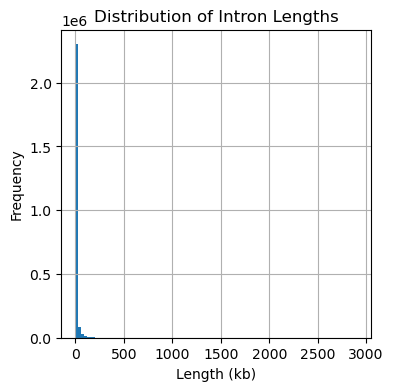

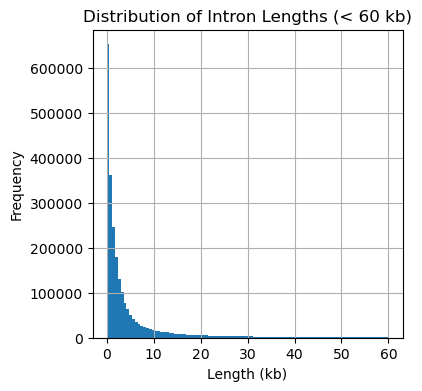

In [162]:
# plot histogram of intron lengths
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 4))
plt.hist(introns_df['width']/1000, bins=100)
plt.title('Distribution of Intron Lengths')
plt.xlabel('Length (kb)')
plt.ylabel('Frequency')
plt.grid()
plt.show()

# zoom in on the introns < 100 kb
plt.figure(figsize=(4, 4))
plt.hist(introns_df[introns_df['width'] < 60000]['width']/1000, bins=100)
plt.title('Distribution of Intron Lengths (< 60 kb)')
plt.xlabel('Length (kb)')
plt.ylabel('Frequency')
plt.grid()
plt.show()  